<a href="https://colab.research.google.com/github/Alainm74/DataAnalystPortafolio/blob/main/Machine_Learning_CNN_%26_Transfer_Learning_Algorithm_Python_Alain_Monroy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING AND PATTERN RECOGNITION


##Author
Ruben Alain Monroy Perez Negron


##1.Introduction
Using the image dataset from the following link
(https://drive.google.com/drive/folders/1KALEdYfDuRQoulip7Qwa9S4R0v4ZXWDH?usp=drive_link):

1.1 Determine how to import and use the data (The images provided are in their respective classification labels).

1.2 Apply two classification models and compare their results.
-  Convolutional neural network (CNN),
-  Transfer learning algorithm for the same dataset
1.3 Implement fine-tuning of the algorithms.  





##2.Data Preparation
Source
* https://www.tensorflow.org/tutorials/images/classification

###2.1 Import Data

####2.1.1 Setup

Import TensorFlow and other necessary libraries:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

####2.1.2 Download and explore the dataset

Source
* https://stackoverflow.com/questions/48376580/how-to-read-data-in-google-colab-from-my-google-drive


In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
White_Chocolate_download_path = os.path.expanduser('~/.keras/datasets/Chocolate_Classification/White_Chocolate')
try:
  os.makedirs(White_Chocolate_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1YBTJuDLgm6nnWRW9k9PnTRKJTe2_RYN6' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(White_Chocolate_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


title: Image_56.jpg, id: 1JHJlMxhZP5xspyaLO58D8eI2Cg9XKNGO
downloading to /root/.keras/datasets/Chocolate_Classification/White_Chocolate/Image_56.jpg
title: Image_72.jpg, id: 1nKVfJKYVITYGDa3r3hc_MeAPp_WQty3t
downloading to /root/.keras/datasets/Chocolate_Classification/White_Chocolate/Image_72.jpg
title: Image_74 copy.jpg, id: 102jUpihRJmi2SZQWBiWU_LbmH1YwWq4C
downloading to /root/.keras/datasets/Chocolate_Classification/White_Chocolate/Image_74 copy.jpg
title: Image_57.jpeg, id: 1Jvl7eFsU_9ogasZbnMqYbvU-B5EmWulB
downloading to /root/.keras/datasets/Chocolate_Classification/White_Chocolate/Image_57.jpeg
title: Image_93.png, id: 16CDW8GI9t9PE8Hb0nmPqCG4wx9bDlK_N
downloading to /root/.keras/datasets/Chocolate_Classification/White_Chocolate/Image_93.png
title: Image_8.png, id: 1jGpfXWnkafEvv2cj7GTj1dSKhuXogfKa
downloading to /root/.keras/datasets/Chocolate_Classification/White_Chocolate/Image_8.png
title: Image_76.jpg, id: 15zbxoYR-gdXAUnTyR_9TWeelsFSbGjmQ
downloading to /root/.keras/dat

In [ ]:
# choose a local (colab) directory to store the data.
Dark_Chocolate_download_path = os.path.expanduser('~/.keras/datasets/Chocolate_Classification/Dark_Chocolate')
try:
  os.makedirs(Dark_Chocolate_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'18AH77eg6K7OFPBpvG4NkkdqtzCoD40AY' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(Dark_Chocolate_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


title: Image_208.jpg, id: 1HdZiOAerB5FwvgbhJWxSxy_S0qhOvE9j
downloading to /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate/Image_208.jpg
title: Image_219.jpg, id: 1VdOaLPfIoI2kfBaGOR2R32KNBHyvQfKD
downloading to /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate/Image_219.jpg
title: Image_78.jpg, id: 1zIMtMilJxis7Im9nCFVWM_tr6rte-HMH
downloading to /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate/Image_78.jpg
title: Image_250.jpg, id: 1gEL8aN0Sc1GDnYL-djWO9m-BR4xEi4WU
downloading to /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate/Image_250.jpg
title: Image_161.jpeg, id: 1tmF26pYv0coPmiT-Gz27NSbijSSCRp-o
downloading to /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate/Image_161.jpeg
title: Image_75.jpg, id: 19kw_EmJcorhOPYQ6KDeHrBFwZXnodIKZ
downloading to /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate/Image_75.jpg
title: Image_179.jpg, id: 1pEMflPWAjYm7m9ZOEP8y62ELqqY-FDTu
downloading to /root/.keras/datasets

In [ ]:
print(White_Chocolate_download_path)
print(Dark_Chocolate_download_path)

/root/.keras/datasets/Chocolate_Classification/White_Chocolate
/root/.keras/datasets/Chocolate_Classification/Dark_Chocolate


Initially, there are 137 total images, White_Chocolate = 68 and Dark_Chocolate = 69

In [ ]:
download_path = '/root/.keras/datasets/Chocolate_Classification'

#defining function for counting chocolate images in folder and subfolder

def count_chocolates():
  download_path = '/root/.keras/datasets/Chocolate_Classification'
  paths = [White_Chocolate_download_path, Dark_Chocolate_download_path,download_path]

  for path in paths:
    # Convert the string to a pathlib.Path object
    download_path = pathlib.Path(path)
    if path == paths[2]:
      image_count = len(list(download_path.glob('*/*')))
    else:
      image_count = len(list(download_path.glob('**/*')))
    print(f'There are {image_count} total images in {download_path}')
  return

count_chocolates()


There are 68 total images in /root/.keras/datasets/Chocolate_Classification/White_Chocolate
There are 69 total images in /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate
There are 137 total images in /root/.keras/datasets/Chocolate_Classification


####2.1.3 Preprocess the images to ensure a robust model

Source
* https://stackoverflow.com/questions/68191448/unknown-image-file-format-one-of-jpeg-png-gif-bmp-required

In [ ]:
from pathlib import Path
import imghdr


#download_path
download_path = pathlib.Path(download_path)
#image_count = len(list(download_path.glob('*/*')))

img_link=list(download_path.glob('*/*'))

count_num=0
for lnk in img_link:
    binary_img=open(lnk,'rb')
    find_img=tf.compat.as_bytes('JFIF') in binary_img.peek(10)#The JFIF is a JPEG File Interchange Format (JFIF).
    if not find_img:
        count_num+=1
        os.remove(str(lnk))
print(f'Total images deleted from Dataset: {count_num}')

Total images deleted from Dataset: 27


After preprocessing the dataset, 27 images were deleted. Hence, there are 110 total images:

In [ ]:
count_chocolates()


There are 56 total images in /root/.keras/datasets/Chocolate_Classification/White_Chocolate
There are 54 total images in /root/.keras/datasets/Chocolate_Classification/Dark_Chocolate
There are 110 total images in /root/.keras/datasets/Chocolate_Classification


Below can found the first two white chocolate images from the dataset:

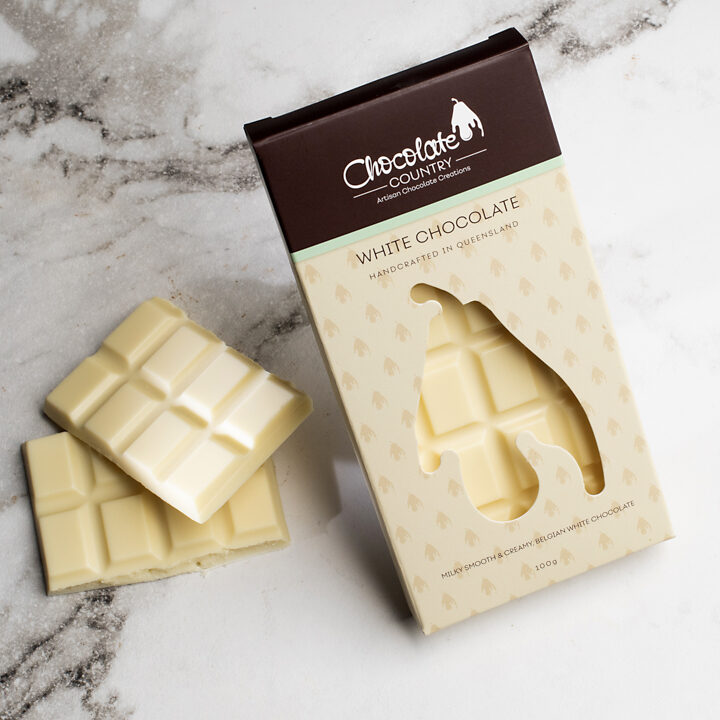

In [ ]:
White_Chocolate = list(download_path.glob('White_Chocolate/*'))
PIL.Image.open(str(White_Chocolate[0]))

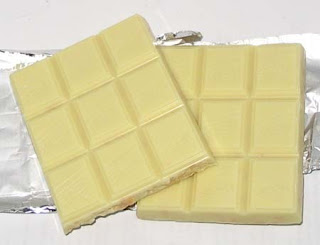

In [ ]:
PIL.Image.open(str(White_Chocolate[1]))

Below can found the first two dark chocolate images from the dataset:

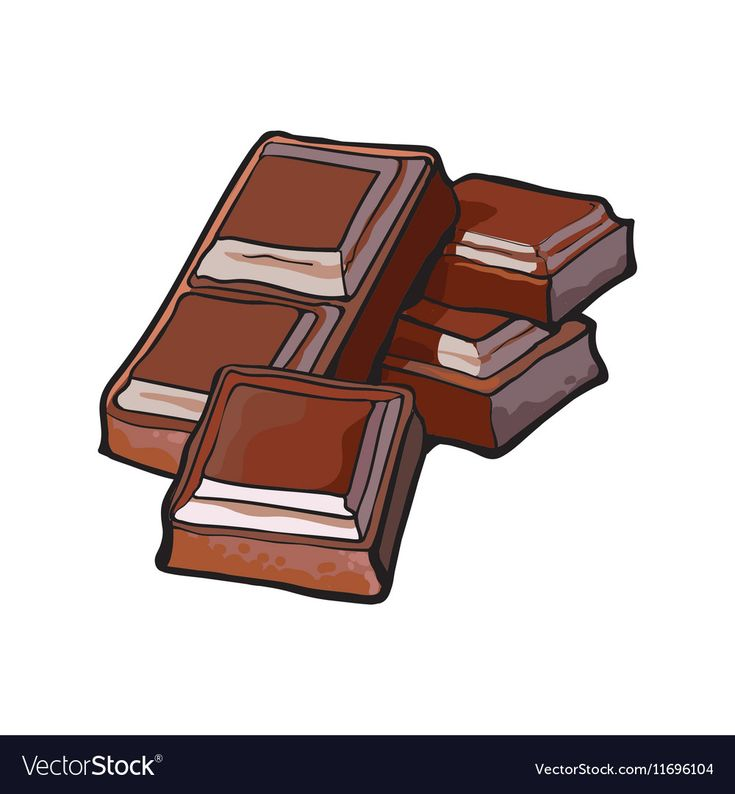

In [ ]:
Dark_Chocolate = list(download_path.glob('Dark_Chocolate/*'))
PIL.Image.open(str(Dark_Chocolate[0]))

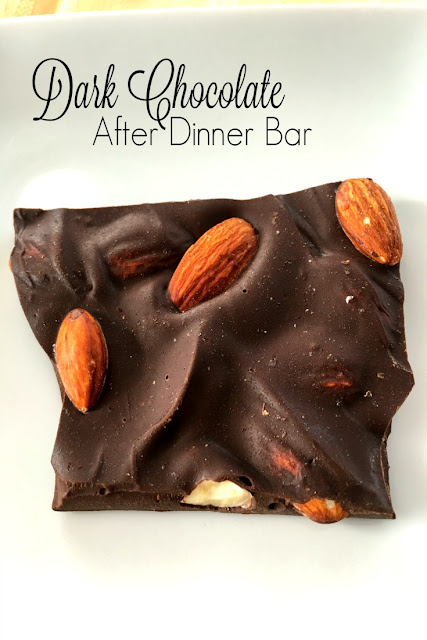

In [ ]:
PIL.Image.open(str(Dark_Chocolate[1]))

### 2.2 Classification models to be compared:
-  Convolutional neural network (CNN),
-  Transfer learning algorithm for the same dataset

## 3 Convolutional neural network (CNN)
Source
* https://www.tensorflow.org/tutorials/images/classification

### 3.1 Load data using a Keras utility

`tf.keras.utils.image_dataset_from_directory` will let moving the images from a directory into a `tf.data.Dataset`

### 3.2 Create a dataset

Defining some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Split dataframe into random train and test subsets, 80% of the images for training and 20% for validation.


In [ ]:
#Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  download_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 110 files belonging to 2 classes.
Using 88 files for training.


In [ ]:
#Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  download_path,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 110 files belonging to 2 classes.
Using 22 files for validation.


`class_names` attribute provides the corresponding names of classes according to the directory names in alphabetical order.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Dark_Chocolate', 'White_Chocolate']


### 3.3 Visualize the data

Below can found the first nine images from the training dataset:

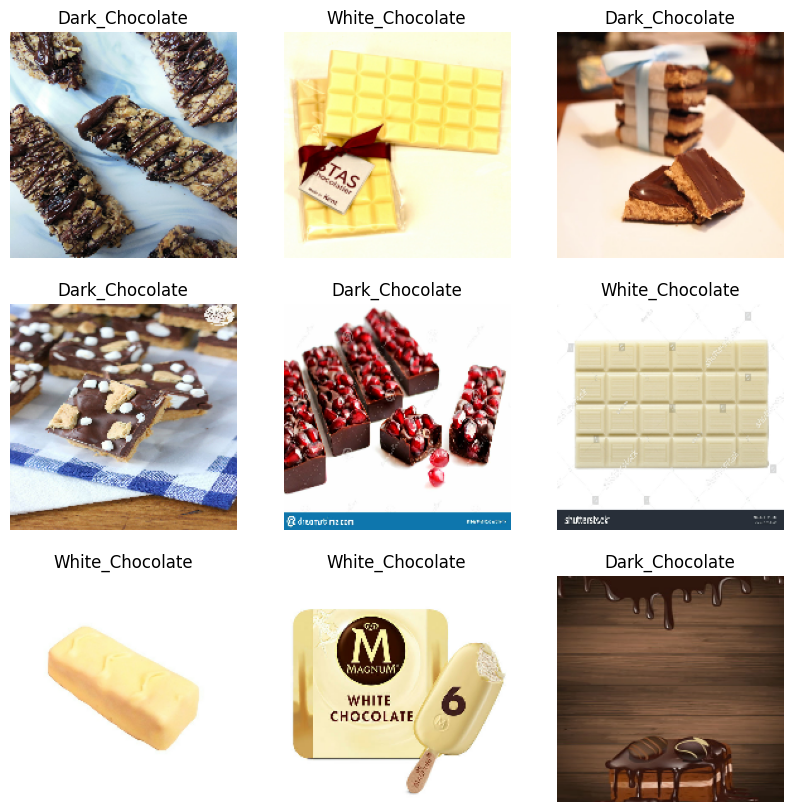

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Additional information over batches of images:

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`, as established above:
- batch_size = 32
- img_height = 180
- img_width = 180
- 3: color channels RGB (This was not manually settled before)

### 3.4 Configure the dataset for performance

Two buffered prefetching important methods when loading data to avoid I/O blocking while yielding data from disk.

- `Dataset.cache` keeps the images in memory after loading them off disk during the first epoch. For large datasets, this method can be used to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 3.5 Standardize the data

The RGB channel values are in the `[0, 255]` range. Which is not  not ideal for a neural networ. Thus, these values will be standardized in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [ ]:
normalization_layer = layers.Rescaling(1./255)

This layer will be used by applying it to the dataset by calling `Dataset.map`:

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


### 3.6 Keras model


The Keras [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model consists of three convolution blocks:
1. (`tf.keras.layers.Conv2D`) with a max pooling layer
2. (`tf.keras.layers.MaxPooling2D`) in each of them.
3. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`).

**It is important to mention that the first model will not consider any technique to fight against overfitting, this will be shown in a separate section "Optimization"**

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### 3.6.1 Compile the model

For first model, the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function were chosen.

Regarding the accuracy of training and validation for each training epoch, the `metrics` argument is added to `Model.compile`.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### 3.6.2 Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#### 3.6.3 Train the model

According to Keras, epochs is defined as "one pass over the entire dataset". Hence, the initial model will only consider 10 epochs with the Keras `Model.fit` method.

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 2.7253 - accuracy: 0.3864 - val_loss: 3.1536 - val_accuracy: 0.4545
Epoch 2/10
3/3 [==============================] - 3s 901ms/step - loss: 2.1786 - accuracy: 0.5000 - val_loss: 0.7648 - val_accuracy: 0.4545
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.6949 - accuracy: 0.6591 - val_loss: 0.6406 - val_accuracy: 0.7727
Epoch 4/10
3/3 [==============================] - 3s 998ms/step - loss: 0.6502 - accuracy: 0.6023 - val_loss: 0.6685 - val_accuracy: 0.4545
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.5970 - accuracy: 0.8182 - val_loss: 0.6245 - val_accuracy: 0.8182
Epoch 6/10
3/3 [==============================] - 2s 814ms/step - loss: 0.5478 - accuracy: 0.9091 - val_loss: 0.5872 - val_accuracy: 0.8636
Epoch 7/10
3/3 [==============================] - 4s 2s/step - loss: 0.4657 - accuracy: 0.8977 - val_loss: 0.5266 - val_accuracy: 0.8182
Epoch 8/10
3/3 [================

The model is changing over time, the loss over the first batches of an epoch is generally higher than over the last batches. This can guide us to an initial takeaway, the use of few epochs could lead to underfitting the model, however, a high number of epochs could lead to overfitting.

#### 3.6.4 Visualize training results

Ploting loss and accuracy on the training and validation sets:

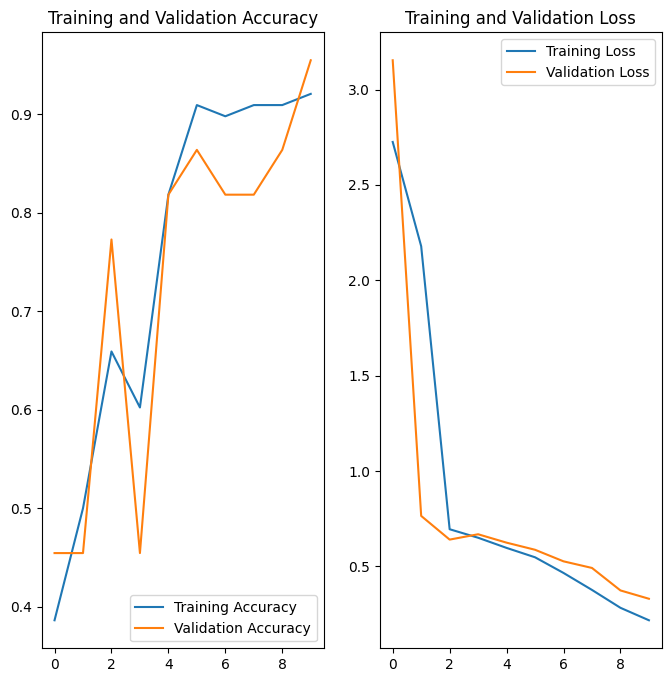

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 80% accuracy on the validation set.

### 3.7 Overfitting
Source
* https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

**Overfitting**

Regarding the initial model and according with the  plots, the training accuracy is increasing linearly over time upto epoch 9 were seems to be more stable, the validation accuracy stalls around 80% in the training process.

Further tasks will be carried out to improve the model and check any sign of overfitting.

In order to tackle the overfitting two techniques will be used in the model **data augmentation** and **dropout**.

#### 3.7.1 Data augmentation

Overfitting generally occurs when there are a small number of training examples, thus [Data augmentation](./data_augmentation.ipynb) takes the approach of generating additional training data from the existing examples using random transformations that yield believable-looking images.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Below can be shown a few augmentation examples.

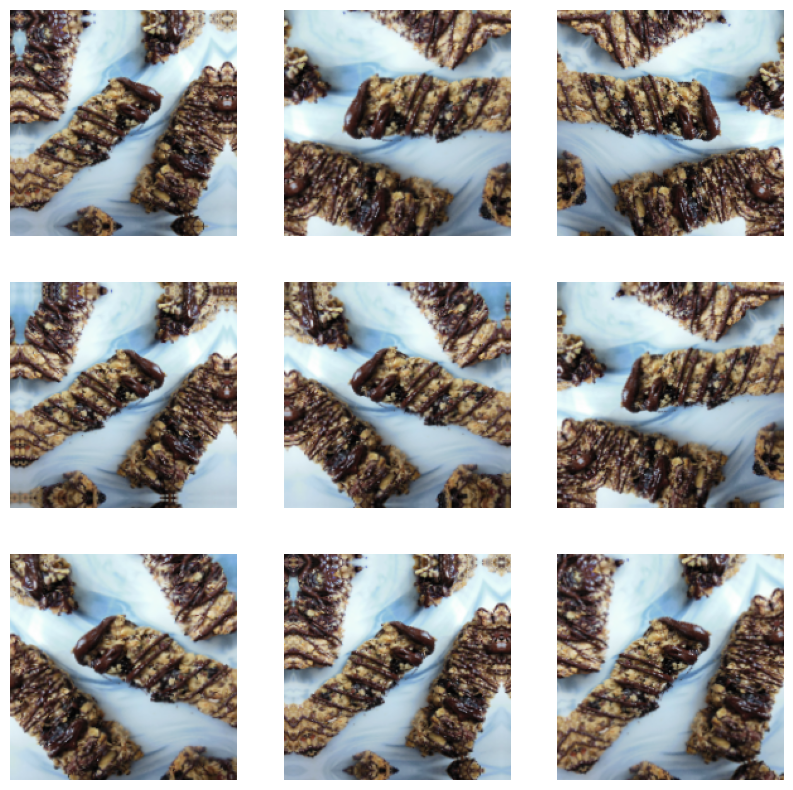

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### 3.7.2 Dropout
Source
* https://developers.google.com/machine-learning/glossary#dropout_regularization

Randomly drops out a number of output units from a layer during the training process.

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

### 3.8 Optimization

#### 3.8.1 Epochs

**EarlyStopping()**
As mentioned above, higher number of epochs could lead to a better result in the prediction model with the risk of overfitting. EarlyStopping function helps to prevent overfitting and allows to find the optimal number of epochs.

**restore_best_weights**
restore_best_weights is on of EarlyStopping() parameters to consider, it will let to restore model weights from the epoch with the best value of the monitored quantity.

**patience**
Number of epochs with no improvement after which training will be stopped. Defaults to 0

Source
* https://keras.io/api/callbacks/early_stopping/


In [ ]:
# Set up early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True,)


#### 3.8.2 Optimizer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to different lectures and professionals in Data Science field, in practice Adam use to be the top optimizer for classification tasks.

Eventough the previous mentioned, other optimizers as 'rmsprop' and 'sgd will be considered.


Source
* https://keras.io/api/optimizers/
* https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/

In [ ]:
optimizers = ['adam', 'rmsprop', 'sgd']

best_val_accuracy = 0
best_optimizer = None
best_model_weights = None

# Compile and train the model testing different optimizers
for optimizer in optimizers:
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    epochs = 100
    print(f'Running tuned model, optimizer:{optimizer}')
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
      callbacks=[early_stopping]
      )

    print(f"Results for optimizer {optimizer}, accuracy: {history.history['accuracy'][-1]}, val_accuracy: {history.history['val_accuracy'][-1]}")

    # Check if the current optimizer performed better
    if max(history.history['val_accuracy']) > best_val_accuracy:
        best_val_accuracy = max(history.history['val_accuracy'])
        best_optimizer = optimizer
        best_model_weights = model.get_weights()  # Store the best model weights
        best_history = history

# Apply the best model weights found during training
model.set_weights(best_model_weights)

# Print final message indicating the best model and parameters
print(f"Best Optimizer: {best_optimizer}, Best Validation Accuracy: {best_val_accuracy}")

Running tuned model, optimizer:adam
Epoch 1/100
3/3 [==============================] - 5s 1s/step - loss: 5.9788 - accuracy: 0.3750 - val_loss: 1.1258 - val_accuracy: 0.5455
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 1.8078 - accuracy: 0.5000 - val_loss: 0.7577 - val_accuracy: 0.4545
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 1.1112 - accuracy: 0.5000 - val_loss: 0.7428 - val_accuracy: 0.4545
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.8209 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4545
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.6818 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 5s 2s/step - loss: 0.6865 - accuracy: 0.4886 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 0.6872 - accuracy: 0.5682 - val_loss: 0.6918 - val_accuracy: 0.590

#### 3.8.3 Visualize training results

After applying different tunning techniques to deal with overfitting (data augmentation and `tf.keras.layers.Dropout`) and additional hyper parameter tuning (optimizers and epochs), the image classification model shows improvement as of training and validation accuracy are closer aligned. This can also be identified by plotting accuracy and loss.

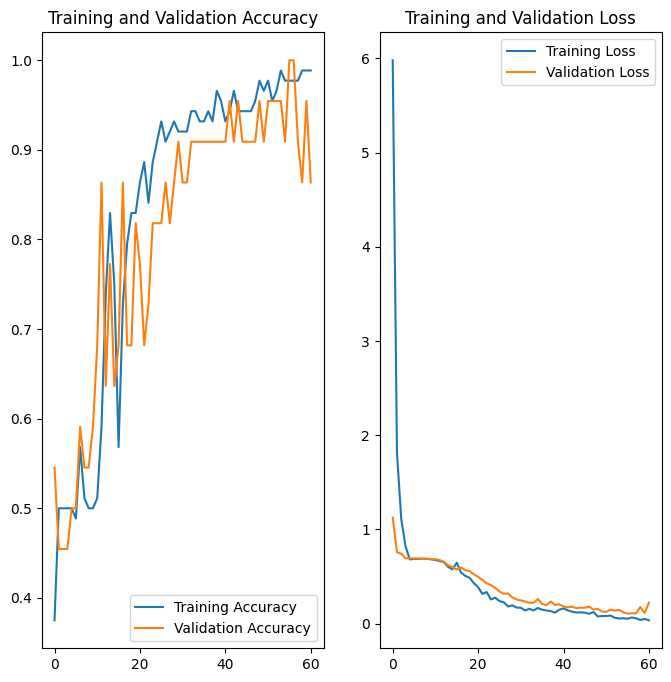

In [ ]:
# Plotting for the best optimizer
acc = best_history.history['accuracy']
val_acc = best_history.history['val_accuracy']

loss = best_history.history['loss']
val_loss = best_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##4 Transfer learning
Source
* https://www.tensorflow.org/tutorials/images/transfer_learning

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. This will be used in a transfer learning model to improve the results.

The following section will provide two examples related to Transfer learning algorithms:

1. Feature Extraction
2. Fine-Tuning

It is important to consider that the model run in sectio 3 will be used as pre-trained model for applyng the Transfer learning algorithms.

### 4.1 Create the base model from the pre-trained convnets

The base model will be created from  the MobileNet V2 model developed at Google and pre-trained  on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes.

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (180, 180)


In [ ]:
#Training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
  download_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  batch_size=BATCH_SIZE,
  image_size=IMG_SIZE
)


Found 110 files belonging to 2 classes.
Using 88 files for training.


In [ ]:
#validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    download_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 110 files belonging to 2 classes.
Using 22 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 4)
validation_dataset = validation_dataset.skip(val_batches // 4)

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 1
Number of test batches: 0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

####4.1.1 Rescale pixel values

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


###4.2 Feature extraction

####4.2.1 Freeze the convolutional base

In [ ]:
base_model.trainable = False

The pre-trained model does not incluede a BatchNormalization layer

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 90, 90, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 90, 90, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 90, 90, 32)           0         ['bn_Conv1[

####4.2.2 Add a classification head

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


 Convert these features into a single prediction per image

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers

In [ ]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 180, 180, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 6, 6, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
len(model.trainable_variables)

2

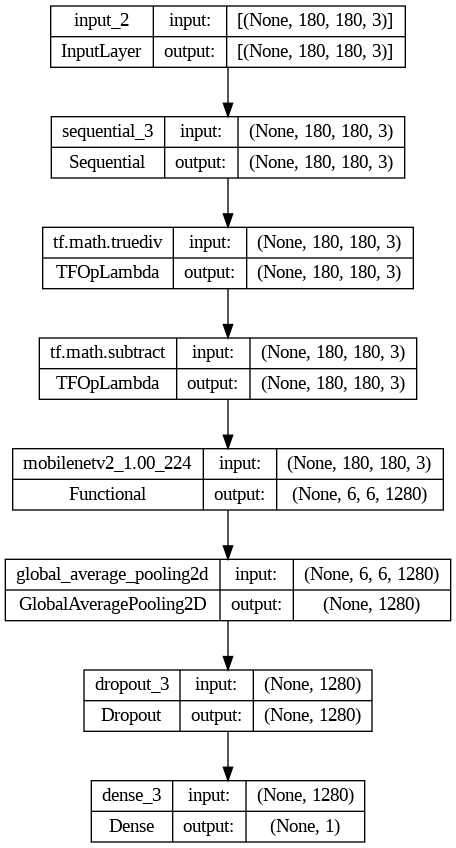

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

###4.3 Keras model

####4.3.1 Compile the model

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

####4.3.2 Train the model

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

1/1 [==============================] - 2s 2s/step - loss: 0.5049 - accuracy: 0.8636


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.50
initial accuracy: 0.86


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 8s 985ms/step - loss: 0.6427 - accuracy: 0.6364 - val_loss: 0.5013 - val_accuracy: 0.8636
Epoch 2/10
3/3 [==============================] - 3s 968ms/step - loss: 0.6591 - accuracy: 0.6250 - val_loss: 0.4955 - val_accuracy: 0.8636
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.6826 - accuracy: 0.6023 - val_loss: 0.4896 - val_accuracy: 0.8636
Epoch 4/10
3/3 [==============================] - 3s 965ms/step - loss: 0.6991 - accuracy: 0.6250 - val_loss: 0.4842 - val_accuracy: 0.8636
Epoch 5/10
3/3 [==============================] - 3s 919ms/step - loss: 0.6053 - accuracy: 0.6591 - val_loss: 0.4795 - val_accuracy: 0.8636
Epoch 6/10
3/3 [==============================] - 4s 931ms/step - loss: 0.6044 - accuracy: 0.6705 - val_loss: 0.4748 - val_accuracy: 0.8636
Epoch 7/10
3/3 [==============================] - 3s 980ms/step - loss: 0.6301 - accuracy: 0.6932 - val_loss: 0.4700 - val_accuracy: 0.8636
Epoch 8/10
3/3 [=======

####4.3.3 Visualize training results

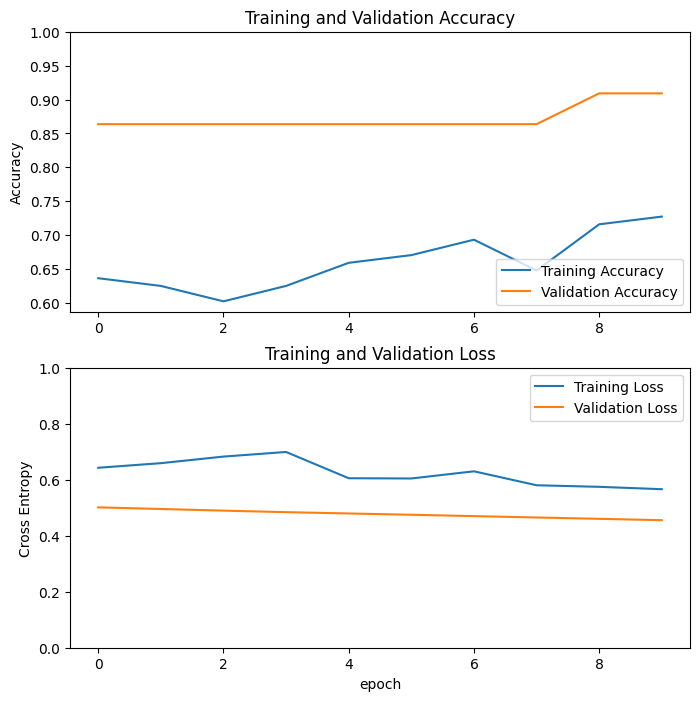

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

###4.4 Fine tuning - Optimization

####4.4.1 Un-freeze the top layers of the model

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


####4.4.2 Compile and train the model to find the best performing.

Considering that a larger model will be trained, the use of a lower learning rate should improve the accuracy of the model. Thus different learning rates will be considered. Also different optimizers will be tested to fin the best hyperparameters.

In [ ]:
# Define the learning rates and optimizers to loop
learning_rates = [0.0001, 0.0005, 0.00001, 0.000001]
optimizers_test = ['adam', 'rmsprop','sgd']

#best_model = None
best_val_accuracy = 0
best_optimizer = None
best_model_weights = None
#best_history = None


for lr in learning_rates:
  for opt in optimizers_test:
    if opt == 'adam':
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt == 'rmsprop':
      optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
    elif opt == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = optimizer,
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

    fine_tune_epochs = 10
    total_epochs = initial_epochs + fine_tune_epochs

    history_fine = model.fit(
        train_dataset,
        epochs=total_epochs,
        initial_epoch=history.epoch[-1],
        validation_data=validation_dataset
    )

    # Print the results for the current optimizer
    print(f"Results for optimizer {opt}, learning rate {lr}:")
    print(f"Accuracy: {history_fine.history['accuracy'][-1]}, Validation Accuracy: {history_fine.history['val_accuracy'][-1]}")

    # Check if the current optimizer performed better
    if max(history_fine.history['val_accuracy']) > best_val_accuracy:
            best_val_accuracy = max(history_fine.history['val_accuracy'])
            best_optimizer = opt
            best_learning_rate = lr
            best_model = model  # Store the best model
            best_model_weights = model.get_weights()  # Store the best model weights
            best_history = history_fine  # Store the best history

# Apply the best model weights found during training
model.set_weights(best_model_weights)

# Print final message indicating the best model and parameters
print(f"\nBest Optimizer: {best_optimizer}, Best Learning rate: {best_learning_rate} Best Validation Accuracy: {best_val_accuracy}")



Epoch 10/20
3/3 [==============================] - 12s 2s/step - loss: 0.7104 - accuracy: 0.6705 - val_loss: 0.4726 - val_accuracy: 0.7273
Epoch 11/20
3/3 [==============================] - 6s 2s/step - loss: 0.5171 - accuracy: 0.7500 - val_loss: 0.3182 - val_accuracy: 0.8182
Epoch 12/20
3/3 [==============================] - 4s 1s/step - loss: 0.3084 - accuracy: 0.8409 - val_loss: 0.2036 - val_accuracy: 0.9091
Epoch 13/20
3/3 [==============================] - 5s 1s/step - loss: 0.1323 - accuracy: 0.9886 - val_loss: 0.1799 - val_accuracy: 0.9545
Epoch 14/20
3/3 [==============================] - 4s 1s/step - loss: 0.1203 - accuracy: 0.9659 - val_loss: 0.1025 - val_accuracy: 0.9545
Epoch 15/20
3/3 [==============================] - 5s 2s/step - loss: 0.0636 - accuracy: 0.9773 - val_loss: 0.1300 - val_accuracy: 0.9545
Epoch 16/20
3/3 [==============================] - 5s 1s/step - loss: 0.0591 - accuracy: 0.9886 - val_loss: 0.0930 - val_accuracy: 0.9545
Epoch 17/20
3/3 [================

####4.4.4 Visualize training results

In [ ]:
acc += best_history.history['accuracy']
val_acc += best_history.history['val_accuracy']

loss += best_history.history['loss']
val_loss += best_history.history['val_loss']

In [ ]:
print(acc)

[0.6363636255264282, 0.625, 0.6022727489471436, 0.625, 0.6590909361839294, 0.6704545617103577, 0.6931818127632141, 0.6477272510528564, 0.7159090638160706, 0.7272727489471436, 0.7727272510528564, 0.9545454382896423, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


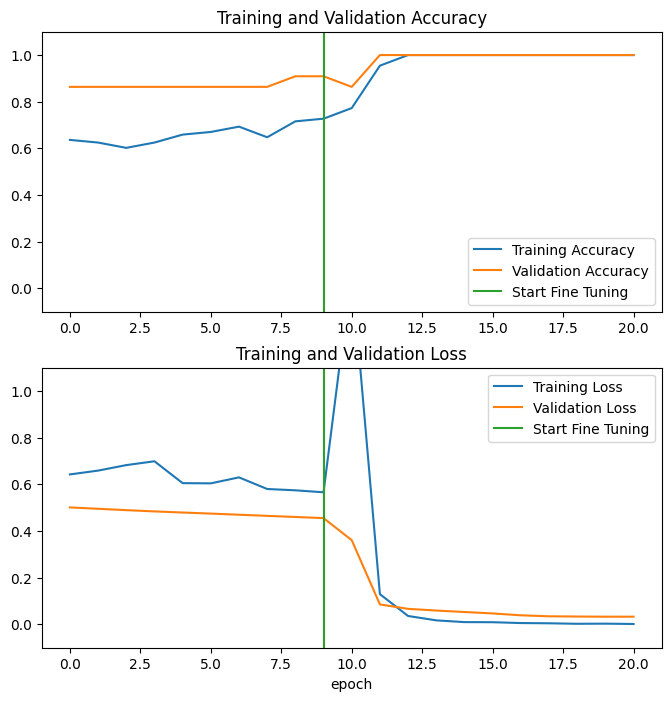

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([-0.1, 1.1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([-0.1, 1.1])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

####4.4.5 Evaluation and prediction

In [ ]:
#loss, accuracy = model.evaluate(test_ds)
#print('Test accuracy :', accuracy)

###5 Conclusion

Even though the initial challenges related to preprocessing the data (pulling the dataset straight from an external Google drive and cleaning the image dataset), CNN and Transfer Learning models were applied. It's important to mention the remarkable improvement of both models after applying different tunning techniques:
- hyperparameters on the epochs such as the EarlyStopping function with restore_best_weights and patience parameters
- Use of different optimizers (adam', 'rmsprop', 'sgd’),
- Un-freeze the top layers of the model,
- Looping the models with different learning rates and optimizers.

Additionally, in this research, as the dataset does not contain a lot of values, an evaluation and prediction for the Transfer Learning model was not performed (test dataset had zero values), this may be changed by using a random dataset and running all the models again.

It can be concluded that considering the hyperparameters application and complexity of the model, the CNN model most of the time could be selected. However, the Transfer Learning model can help to achieve better model performance for more complex dataset, with the corresponding increase on the time invested and the initial model used could also represent another challenge.